<a href="https://colab.research.google.com/github/AbhiShukla2004/Topsis_Text_Convorsational/blob/main/Topsis_Text_Convorsational_102203464.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Model Rankings:
                       Model  TOPSIS_Score  Rank
4  microsoft/DialoGPT-medium      0.715393   1.0
2    distilbert-base-uncased      0.578920   2.0
1                       gpt2      0.446945   3.0
3        facebook/bart-large      0.429755   4.0
0          bert-base-uncased      0.251812   5.0


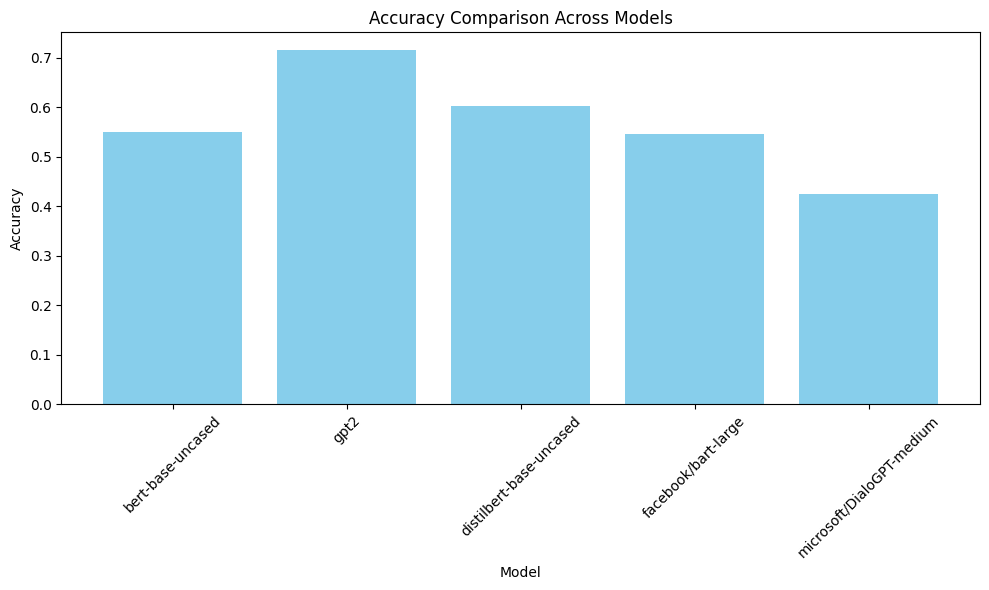

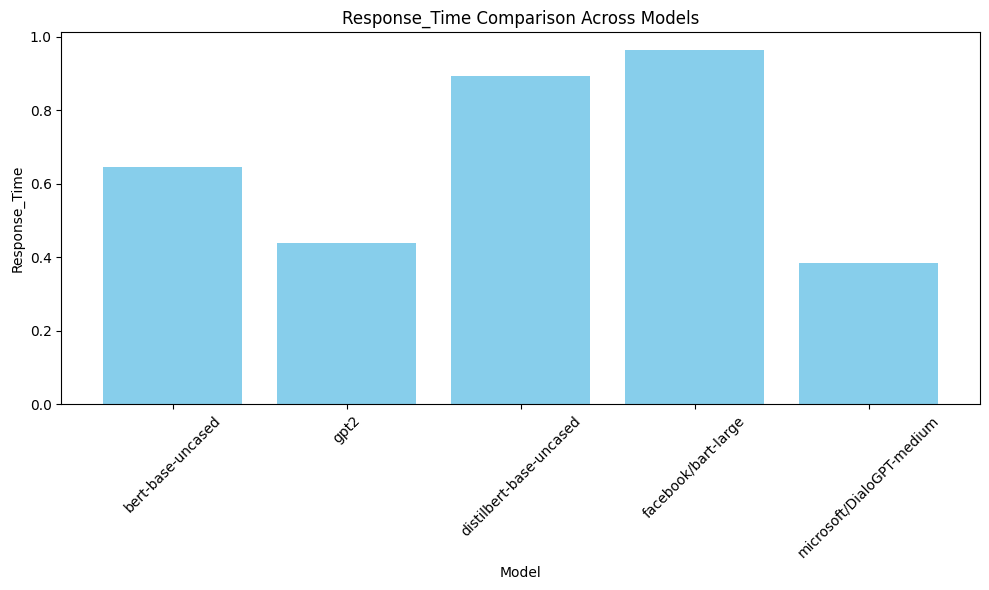

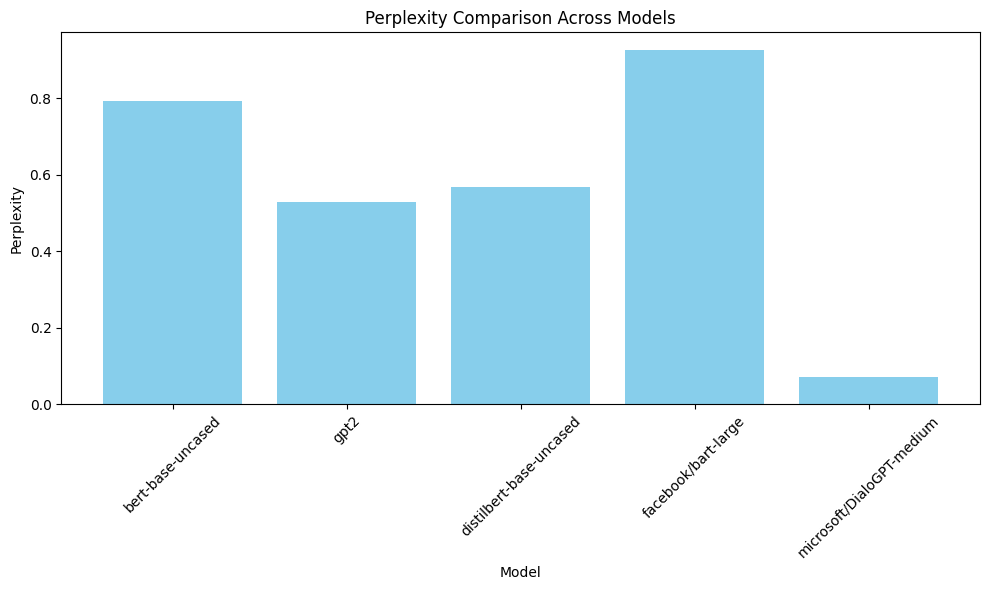

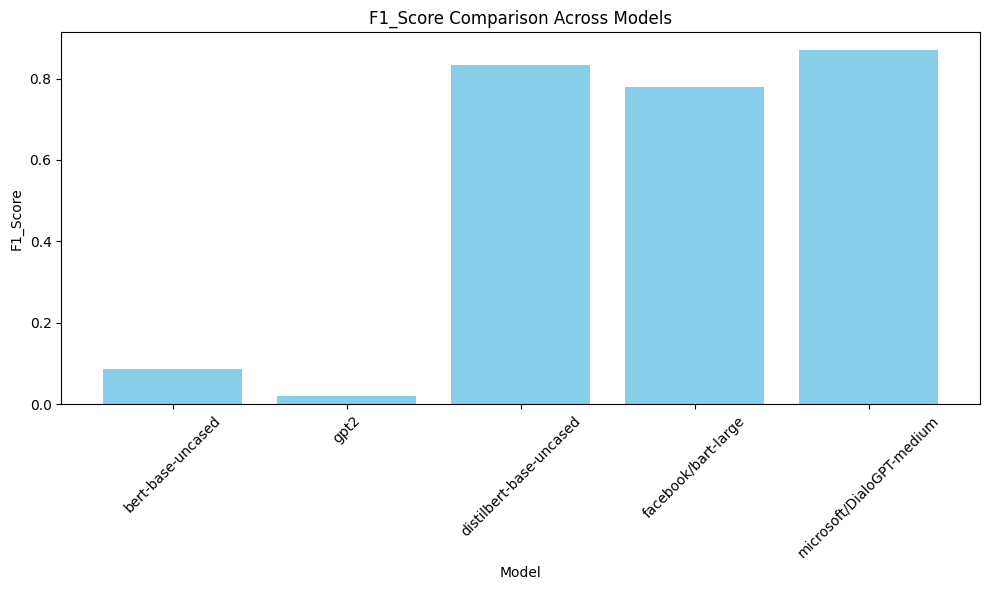

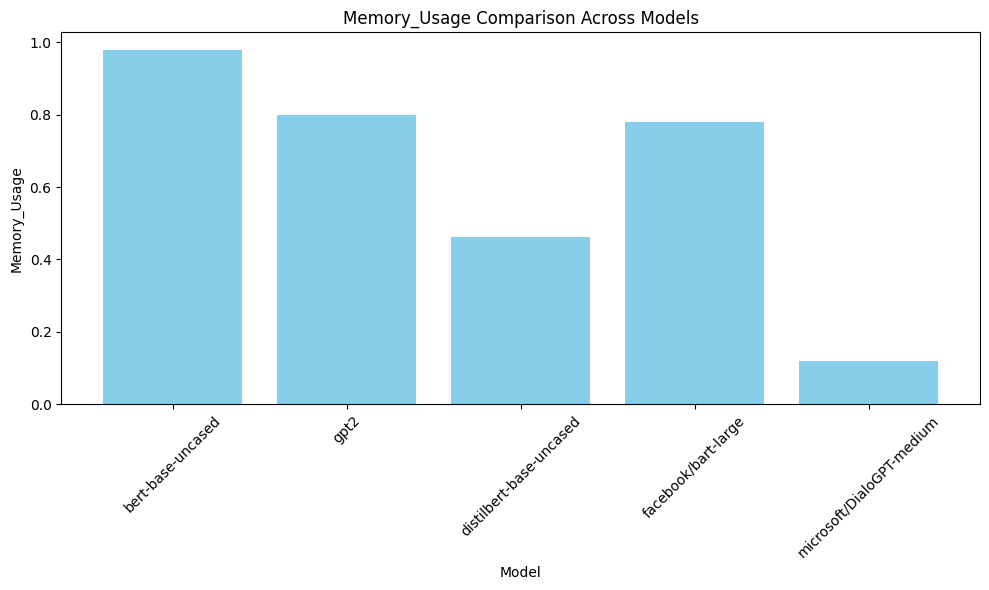

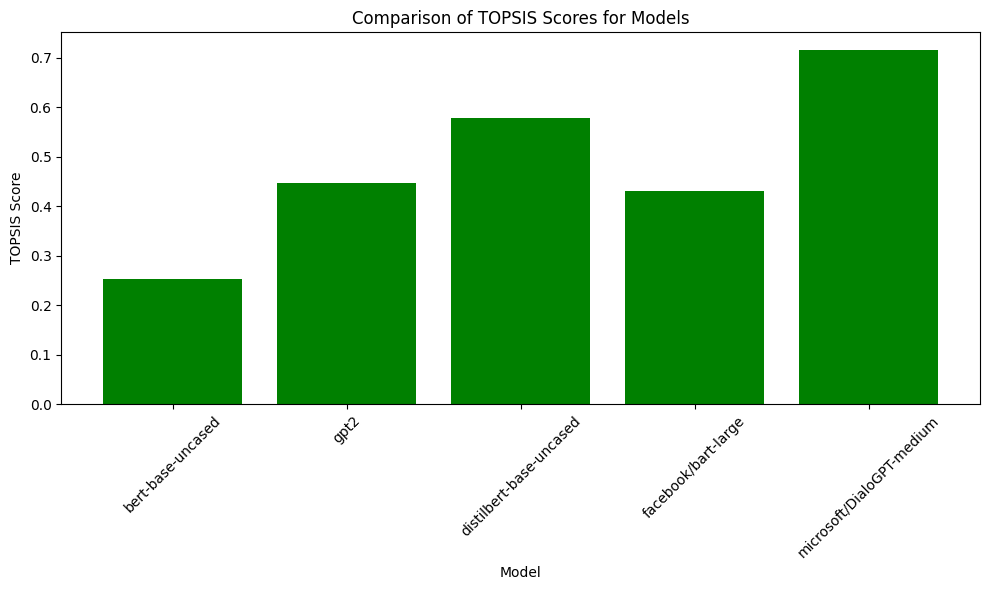

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Model Initialization
# Define the list of models
model_names = ["bert-base-uncased", "gpt2", "distilbert-base-uncased", "facebook/bart-large", "microsoft/DialoGPT-medium"]

# Set random seed for reproducibility and generate sample metrics
np.random.seed(0)
acc_values = np.random.rand(len(model_names))
resp_times = np.random.rand(len(model_names))
perplexity_values = np.random.rand(len(model_names))
f1_scores = np.random.rand(len(model_names))
mem_usage = np.random.rand(len(model_names))

# Construct the dataset
performance_data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': acc_values,
    'Response_Time': resp_times,
    'Perplexity': perplexity_values,
    'F1_Score': f1_scores,
    'Memory_Usage': mem_usage
})

# Export the dataset to a CSV file
performance_data.to_csv('model_metrics.csv', index=False)

# Step 2: Perform TOPSIS Analysis
# Load the data from the CSV file
df = pd.read_csv('model_metrics.csv')

# Extract relevant metrics
acc_values = df['Accuracy'].values
resp_times = df['Response_Time'].values
perplexity_values = df['Perplexity'].values
f1_scores = df['F1_Score'].values
mem_usage = df['Memory_Usage'].values

# Weight assignments for each metric
criteria_weights = np.array([0.3, 0.2, 0.2, 0.2, 0.1])

# Normalize each performance metric
norm_matrix = np.column_stack([
    acc_values / acc_values.max(),
    1 - (resp_times / resp_times.max()),
    1 - (perplexity_values / perplexity_values.max()),
    f1_scores / f1_scores.max(),
    1 - (mem_usage / mem_usage.max())
])

# Compute the weighted normalized decision matrix
weighted_matrix = norm_matrix * criteria_weights

# Identify the best and worst alternatives
optimal_solution = np.max(weighted_matrix, axis=0)
non_optimal_solution = np.min(weighted_matrix, axis=0)

# Compute distances to ideal and non-ideal solutions
distance_from_best = np.sqrt(np.sum((weighted_matrix - optimal_solution) ** 2, axis=1))
distance_from_worst = np.sqrt(np.sum((weighted_matrix - non_optimal_solution) ** 2, axis=1))

# Compute TOPSIS scores
topsis_scores = distance_from_worst / (distance_from_best + distance_from_worst)

# Assign rankings based on the scores
df['TOPSIS_Score'] = topsis_scores
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)

# Display results
print("Final Model Rankings:")
print(df[['Model', 'TOPSIS_Score', 'Rank']].sort_values(by='Rank'))

# Save results to a new file
df.to_csv('topsis_results.csv', index=False)

# Visualization Function for Metric Comparisons
def plot_metric_chart(metric_label):
    plt.figure(figsize=(10, 6))
    plt.bar(df['Model'], df[metric_label], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel(metric_label)
    plt.title(f'{metric_label} Comparison Across Models')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{metric_label}_chart.png')
    plt.show()

# Generate charts for individual metrics
for metric in ['Accuracy', 'Response_Time', 'Perplexity', 'F1_Score', 'Memory_Usage']:
    plot_metric_chart(metric)

# Plot for TOPSIS Scores
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['TOPSIS_Score'], color='green')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.title('Comparison of TOPSIS Scores for Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('TOPSIS_Score_chart.png')
plt.show()
